<div style="text-align: center;">
    <h1 style="color: #a64dff;">Anexo 19</h1>
    <h3>Proyecto 19: Creación de Red Neuronal</h3>
    <hr/>
    <p style="text-align: right;">Mg. Luis Felipe Bustamante Narváez</p>
</div>

En este ejercicio diseñaremos una red neuronal capaz de hacer predicciones sobre diferentes categorías de noticias de un dataset implementado en otros proyectos, donde observaremos como mejora la calidad del proceso con la implementación de las redes.

<div align="center">
  <img src="images/red_neuronal.png" alt="Descripción" width="400">
</div>


## Librerías

In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from IPython.display import display, HTML

## Cargamos los Datos

In [2]:
path = 'data/df_total.csv'
df = pd.read_csv(path)

In [3]:
df

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra
...,...,...,...
1212,https://www.bbva.com/es/como-lograr-que-los-in...,En la vida de toda empresa emergente llega un ...,Innovacion
1213,https://www.bbva.com/es/podcast-como-nos-afect...,La espiral alcista de los precios continúa y g...,Macroeconomia
1214,https://www.larepublica.co/redirect/post/3253735,Las grandes derrotas nacionales son experienci...,Alianzas
1215,https://www.bbva.com/es/bbva-y-barcelona-healt...,BBVA ha alcanzado un acuerdo de colaboración c...,Innovacion


## Procesamiento de los Datos

### Creamos las categorías

In [4]:
target = df['Type'].astype('category').cat.codes

In [5]:
target

0       3
1       4
2       0
3       2
4       3
       ..
1212    1
1213    2
1214    0
1215    1
1216    0
Length: 1217, dtype: int8

In [6]:
# Adicionamos la columna al df
df['target'] = target

In [7]:
df

,url,news,Type,target
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra,3
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones,4
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas,0
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia,2
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra,3
...,...,...,...,...
1212,https://www.bbva.com/es/como-lograr-que-los-in...,En la vida de toda empresa emergente llega un ...,Innovacion,1
1213,https://www.bbva.com/es/podcast-como-nos-afect...,La espiral alcista de los precios continúa y g...,Macroeconomia,2
1214,https://www.larepublica.co/redirect/post/3253735,Las grandes derrotas nacionales son experienci...,Alianzas,0
1215,https://www.bbva.com/es/bbva-y-barcelona-healt...,BBVA ha alcanzado un acuerdo de colaboración c...,Innovacion,1


### Separamos el conjunto de Datos

In [8]:
df_train, df_test = train_test_split(df, test_size=0.3)

### Vectorizamos con TF-IDF

In [9]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df_train['news'])
X_test = vectorizer.transform(df_test['news'])

In [12]:
X_train

<851x25101 sparse matrix of type '<class 'numpy.float64'>'
	with 203924 stored elements in Compressed Sparse Row format>

In [13]:
X_test

<366x25101 sparse matrix of type '<class 'numpy.float64'>'
	with 82175 stored elements in Compressed Sparse Row format>

### Convertimos los conjuntos a Arreglos (tensorFlow)

In [26]:
X_train = X_train.toarray()
X_test = X_test.toarray()

### Creamos los conjuntos de salida

In [10]:
Y_train = df_train['target']
Y_test = df_test['target']

In [15]:
len(Y_train)

851

In [16]:
len(Y_test)

366

### Obtenemos el número de clases

In [20]:
K = df['target'].max() + 1
K

7

### Obtenemos las Dimensiones

In [21]:
D = X_train.shape[1]

In [36]:
D

25101

#### Explicación

1. `train_test_split(df, test_size=0.3)` divide el DataFrame en un 70% para entrenamiento y un 30% para prueba.
2. `TfidfVectorizer()` convierte el texto (columna `'news'`) en vectores numéricos usando TF-IDF.
3. `fit_transform()` y `transform()` generan la matriz de características para entrenamiento y prueba.
4. `toarray()` convierte las matrices dispersas a arrays NumPy densos.
5. `Y_train` y `Y_test` son las etiquetas objetivo.
6. `K` es el número total de clases (asumiendo clases de 0 a K−1).
7. `D` es la dimensión de entrada, es decir, el número de características por muestra.

## Modelo

### Construcción del Modelo

In [23]:
# Capa de entrada
i = Input(shape=(D,))
# Capa Densa
x = Dense(300, activation='relu')(i)
#Capa de salida Softmax
x = Dense(K)(x)

#Creación del modelo
modelo = Model(i, x)

### Resumen del Modelo

In [24]:
modelo.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 25101)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │     7,530,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         2,107 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,532,707 (28.73 MB)

 Trainable params: 7,532,707 (28.73 MB)

 Non-trainable params: 0 (0.00 B)

### Compilamos el Modelo

In [25]:
modelo.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']    
)

### Entrenamos el Modelo

In [ ]:
r = modelo.fit(
    X_train,
    Y_train,
    validation_data= (X_test, Y_test),
    epochs= 100,
    batch_size= 12   #Total de datos / 12
)

#### Explicación

### 📌 Arquitectura del modelo:
- `Input(shape=(D,))`: entrada de dimensión `D` (viene de la matriz TF-IDF).
- `Dense(300, activation='relu')`: una capa totalmente conectada con 300 neuronas y activación ReLU.
- `Dense(K)`: capa de salida con `K` neuronas (una por clase). No lleva activación porque usamos `from_logits=True` en la pérdida.

---

### 🧠 Compilación:
- **Loss**: `SparseCategoricalCrossentropy(from_logits=True)` se usa porque las etiquetas están codificadas como enteros y la salida aún no pasa por softmax.
- **Optimizer**: `'adam'` para una optimización eficiente.
- **Métrica**: `'accuracy'` para evaluar el desempeño.

---

### 📊 Entrenamiento:
- Entrena durante `100` épocas, usando lotes de tamaño `12`.
- Se valida en cada época usando `X_test` y `Y_test`.

---

### Gráfico de la pérdida por iteración

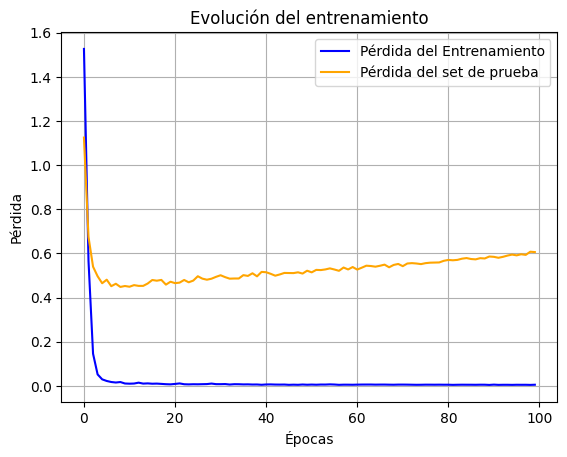

In [34]:
# Gráfico de la función de pérdida (loss)
plt.plot(r.history['loss'], label='Pérdida del Entrenamiento', color='blue')
plt.plot(r.history['val_loss'], label='Pérdida del set de prueba', color='orange')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución del entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

### Gráfico de la presición por iteración

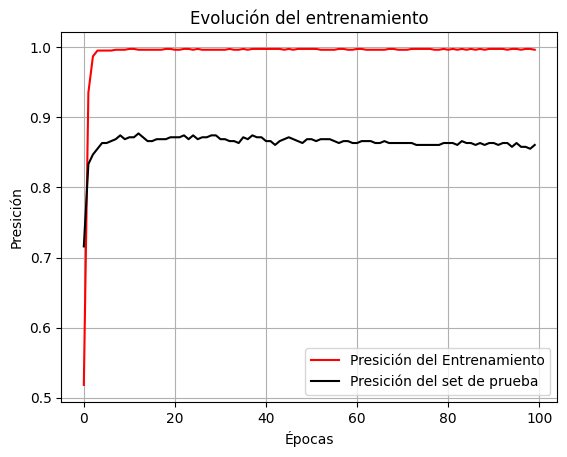

In [35]:
# Gráfico de la métrica de presición (accuracy)
plt.plot(r.history['accuracy'], label='Presición del Entrenamiento', color='red')
plt.plot(r.history['val_accuracy'], label='Presición del set de prueba', color='black')
plt.xlabel('Épocas')
plt.ylabel('Presición')
plt.title('Evolución del entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

## Prueba del Modelo

In [61]:
# Ejemplo de una nueva noticia
nueva_noticia = ["El presidente anunció nuevas medidas \
                    económicas para enfrentar la inflación."]

# Transformar la noticia con el mismo vectorizador usado en entrenamiento
X_nueva = vectorizer.transform(nueva_noticia).toarray()

# Obtener la predicción (logits)
Predict = modelo.predict(X_nueva)

# Aplicar softmax para convertir P en probabilidades
probs = tf.nn.softmax(Predict).numpy()

# Obtener la clase predicha
clase_predicha = np.argmax(probs)

# Obtener el mapeo de códigos a etiquetas
category_mapping = dict(enumerate(df['Type'].astype('category').cat.categories))

# Creamos diccionario para almacenar la probabilidad de cada categoría
probs_dict = {
    category_mapping[i]: float(prob)
    for i, prob in enumerate(probs[0])
}
display(HTML(f"<h3><b>Clase predicha para la noticia:</b>\
                {category_mapping[clase_predicha]}</h3>"))

#Salida en pandas
# Crear DataFrame con categorías y probabilidades
df_probs = pd.DataFrame({
    'Categoría': list(probs_dict.keys()),
    'Probabilidad': list(probs_dict.values())
})

# Ordenar por probabilidad descendente
df_probs = df_probs.sort_values(by='Probabilidad', ascending=False).reset_index(drop=True)

# Mostrar la tabla
df_probs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


,Categoría,Probabilidad
0,Macroeconomia,0.919483
1,Sostenibilidad,0.055128
2,Alianzas,0.019083
3,Otra,0.004394
4,Regulaciones,0.001539
5,Reputacion,0.000312
6,Innovacion,0.000060


### Gráfico de la salida

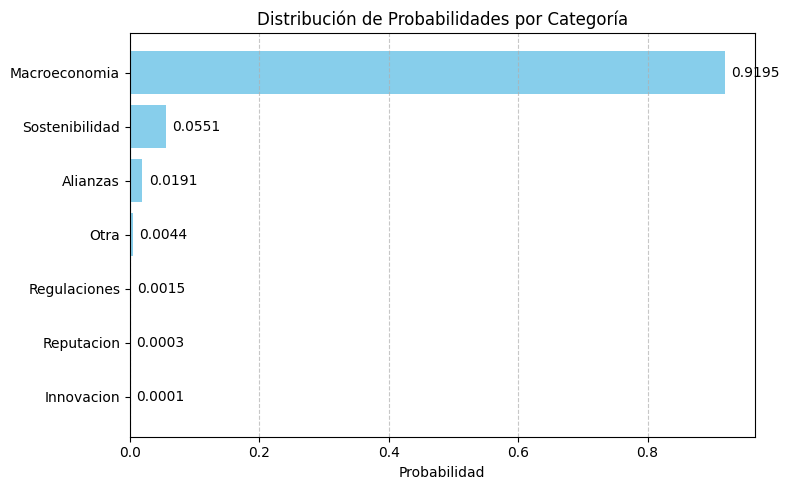

In [58]:
# Gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.barh(df_probs['Categoría'], df_probs['Probabilidad'], color='skyblue')
plt.xlabel('Probabilidad')
plt.title('Distribución de Probabilidades por Categoría')
plt.gca().invert_yaxis()  # Opcional: categoría más probable arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)

#Agregamos etiquetas a cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01,
             bar.get_y() + bar.get_height()/2,
            f'{width:.4f}',
             va= 'center'
            )

plt.tight_layout()
plt.show()

## Conclusiones

<div style="text-align: center;">
    <p>En este modelo, se logró crear una clasificación a través de keras, capaz de indetificar, a partir del contenido de una noticia, cuál es su cateoría. Con un entrenamiento más robusto, podríamos generar un clasificador de mayor presición capaz de clasificar cualquier texto informativo.</p>
        <hr/>
    <p style="text-align: right;">Mg. Luis Felipe Bustamante Narváez</p>
</div>